In [1]:
from __future__ import division
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
init_printing()
u = Function('u')
t, eps= symbols('t epsilon')
omega = symbols('omega', positive=True)

Consider the following system

$$\ddot{u} + 4 u + \varepsilon u^2 \ddot{u} = 0 \enspace .$$

This system can be rewritten as
$$(1 + \varepsilon u^2)\ddot u + 4u = 0 \enspace ,$$
or
$$\ddot u + \frac{4u}{1 + \varepsilon u^2} = 0 \enspace .$$
As a first order system it reads
$$\begin{pmatrix}
\dot u \\ 
\dot v
\end{pmatrix} = \begin{pmatrix}
v \\ 
-\frac{4u}{1 + \varepsilon u^2}
\end{pmatrix} \enspace ,$$
with Jacobian matrix
$$J(u,v) = \begin{bmatrix}
0 & 1 \\ 
-\frac{4(1 - \varepsilon u^2)}{(1+ \varepsilon u^2)^2} & 0
\end{bmatrix} \enspace .$$
This system has a fixed point in $(0,0)$, with eigenvalues
$$\lambda_1 = -2i,\quad \lambda_2 = 2i \enspace ,$$
and we can conclude that this fixed point is a center.

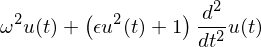

In [3]:
eq = (1 + eps*u(t)**2)*diff(u(t), t, 2) + omega**2*u(t)
eq

## Straightforward expansion

Let's take $u = u_0 +\varepsilon u_1 + \cdots$. Replacing this in the equation we obtain

In [4]:
u0 = Function('u0')
u1 = Function('u1')
subs = [(u(t), u0(t) + eps*u1(t))]

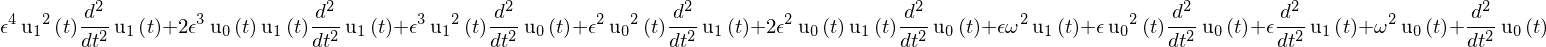

In [5]:
aux = eq.subs(subs)
aux.doit().expand()

In [6]:
poly = Poly(aux.doit(), eps)

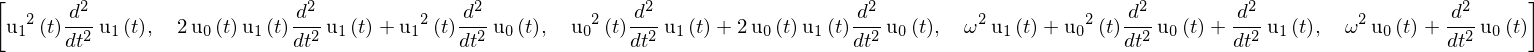

In [7]:
coefs = poly.coeffs()
coefs

In [8]:
sol0 = dsolve(coefs[-1], u0(t)).rhs
sol0

In [9]:
C1, C2, k1, k2 = symbols('C1 C2 k1 k2')

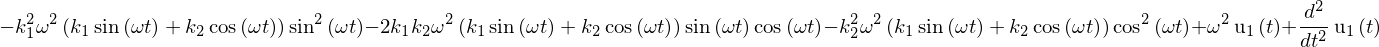

In [10]:
eq_aux = expand(coefs[-2].subs(u0(t), sol0)).subs([(C1, k1), (C2, k2)])
eq_aux.doit()

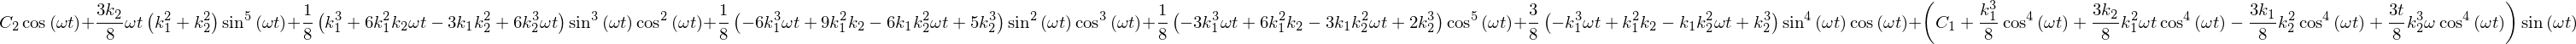

In [11]:
sol1 = dsolve(eq_aux, u1(t)).rhs
sol1

In [12]:
u_app = sol0 + eps*sol1

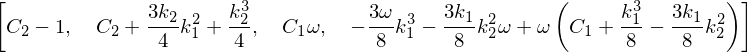

In [13]:
aux_eqs = [
        sol0.subs(t, 0)-1,
        sol1.subs(t, 0),
        diff(sol0, t).subs(t, 0),
        diff(sol1, t).subs(t, 0)]
aux_eqs

In [14]:
coef = u_app.free_symbols - eq.free_symbols

In [15]:
coef

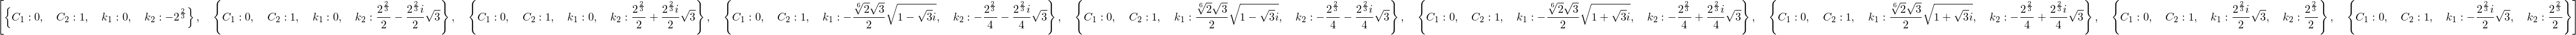

In [16]:
subs_sol = solve(aux_eqs, coef)
subs_sol

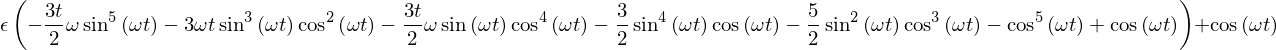

In [17]:
u_app2 = u_app.subs(subs_sol[0])
u_app2

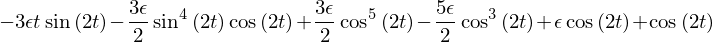

In [18]:
final_sol = trigsimp(u_app2).subs(omega, 2).expand()
final_sol

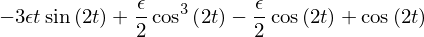

In [19]:
trigsimp(final_sol).expand()

In [20]:
from scipy.integrate import odeint
def fun(x, t=0, eps=0.1):
    x0, x1 = x
    return [x1, -4*x0/(1 + eps*x0**2)]

t_vec = np.linspace(0, 100,  1000)
x = odeint(fun, [1, 0], t_vec, args=(0.1,))

In [21]:
lam_sol = lambdify((t, eps), final_sol, "numpy")
uu = lam_sol(t_vec, 0.1)

<IPython.core.display.Javascript object>


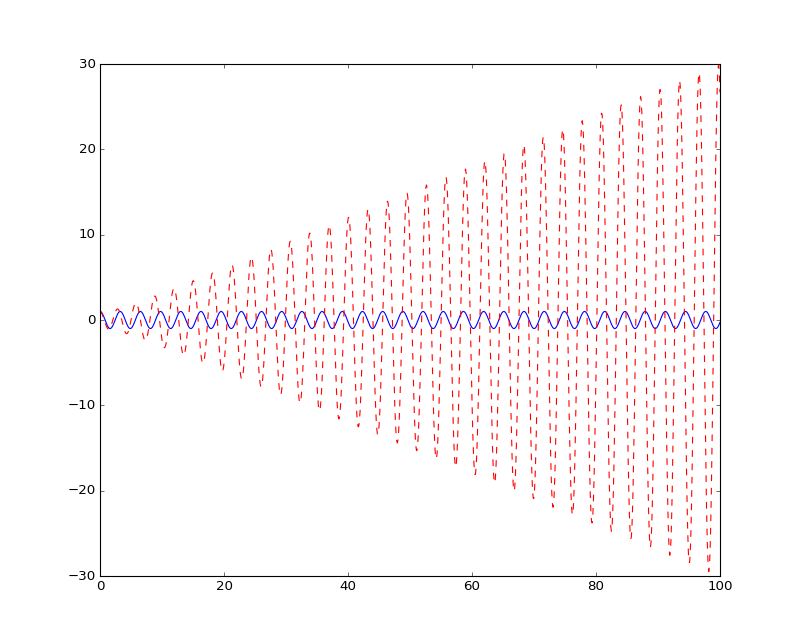

In [22]:
plt.figure(figsize=(10,8))
plt.plot(t_vec, x[:,0])
plt.plot(t_vec, uu, '--r')
plt.show()